In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity

def imshow(title ='Image', image = None ,size = 8):
  w,h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize= (size * aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

In [2]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip

!unzip -qq images.zip

--2022-10-17 11:35:04--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.149.86
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.149.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  18.8MB/s    in 1.5s    

2022-10-17 11:35:06 (18.8 MB/s) - ‘images.zip’ saved [29586716/29586716]



In [3]:
def mse(image1, image2):
  error = np.sum((image1.astype('float') - image2.astype('float') ** 2))
  error /= float(image1.shape[0] * image1.shape[1])

  return error

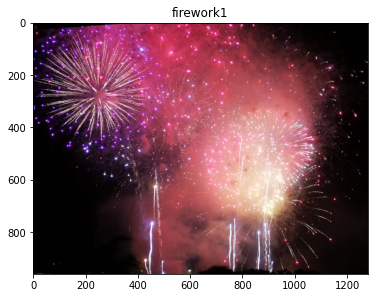

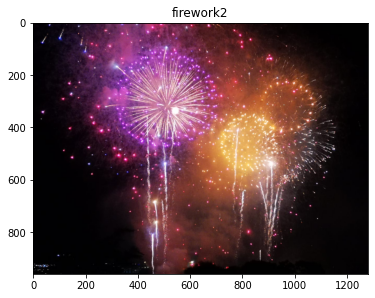

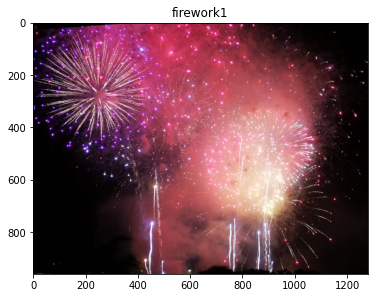

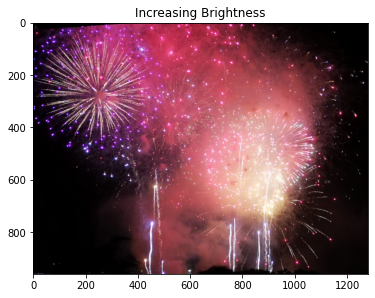

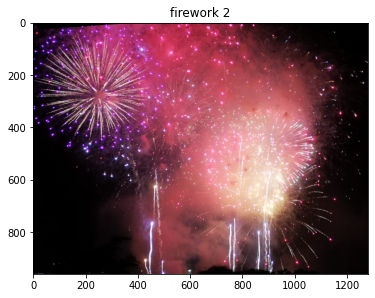

In [5]:
firework1 = cv2.imread('/content/images/fireworks.jpeg')
firework2 = cv2.imread('/content/images/fireworks2.jpeg')

imshow('firework1',firework1)
imshow('firework2', firework2)
M = np.ones(firework1.shape, dtype = 'uint8') *100
firework1b = cv2.add(firework1, M)

imshow('firework1', firework1)
imshow('Increasing Brightness', firework1)
imshow('firework 2', firework1)

In [8]:
def compare(image1, image2):
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
  print('MSE = {:.2f}'.format(mse(image1, image2)))
  print('SS = {:.2f}'.format(structural_similarity(image1, image2)))


In [9]:
compare(firework1, firework1)

MSE = -9361.63
SS = 1.00


In [10]:
compare(firework1, firework2)

MSE = -6405.98
SS = 0.48


In [12]:
compare(firework1, firework1b)

MSE = -30004.60
SS = 0.52


In [13]:
compare(firework2, firework1b)

MSE = -30021.54
SS = 0.19
